In [31]:

%pip install gpxpy folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from matplotlib import pyplot as plt
import numpy as np
import folium
import gpxpy


In [33]:
# обработка точек

gpx_points = []
gpx_waypoints = []

with open("Geo_data.gpx", encoding="utf8") as f:
  gpx = gpxpy.parse(f)
  gpx_waypoints = gpx.waypoints
  for track in gpx.tracks:
    for segment in track.segments:
      for point in segment.points:
        gpx_points.append(point)

points = [(point.latitude, point.longitude) for point in gpx_points]


In [ ]:
# время в пути
# это также можно было взять из GPX файла

duration = (gpx_points[-1].time - gpx_points[0].time)

f"duration: {duration.seconds / 60} min."

'duration: 76.15 min.'

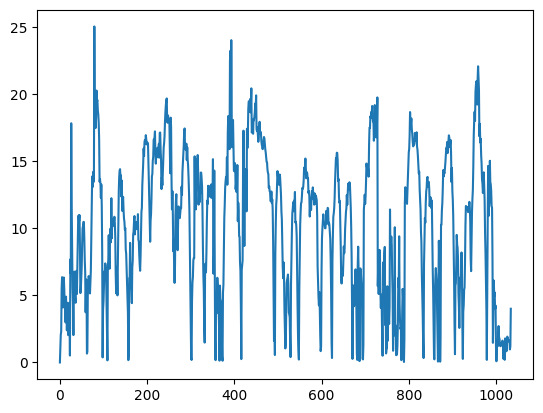

In [35]:
# график скорости

speed = [0] + [point.speed_between(gpx_points[i-1]) for i, point in enumerate(gpx_points) if i > 0]

plt.plot(speed)

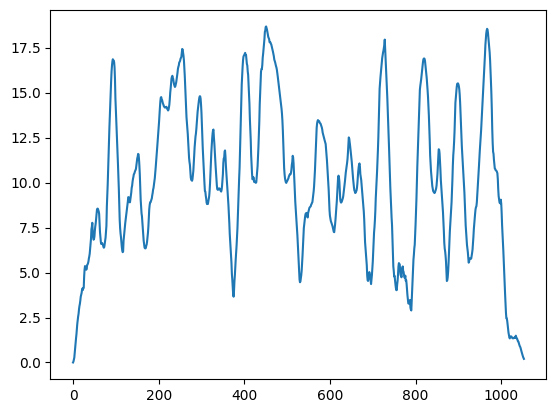

: 

In [ ]:
# график скорости после свертки

conv = np.convolve(speed, np.array([1] * 20)/ 20)

plt.plot(conv)

In [37]:
# выделить регион маршрута и его центр

lat, lon = zip(*points)

map_lat = min(lat) + (max(lat) - min(lat))/2
map_lon = min(lon) + (max(lon) - min(lon))/2

map_lat, map_lon

(55.655118044999995, 37.569625235000004)

In [38]:
# создать маркеры

begin_marker = folium.Marker(
    location=points[0],
    tooltip="waypoint",
    popup="Начало маршрута",
    icon=folium.Icon(color="green"),
)

end_marker = folium.Marker(
    location=points[-1],
    tooltip="waypoint",
    popup="Конец маршрута",
    icon=folium.Icon(color="red"),
)

waypoint_markers = [folium.Marker(
    location=(waypoint.latitude, waypoint.longitude),
    tooltip="waypoint",
    popup=waypoint.name,
    icon=folium.Icon(color="orange"),
) for waypoint in gpx_waypoints]


In [39]:
# маршрут

m = folium.Map(location=(map_lat, map_lon), zoom_start=12, zoom_control=False)

folium.PolyLine(points).add_to(m)

begin_marker.add_to(m)
end_marker.add_to(m)

for w in waypoint_markers:
    w.add_to(m)

m

In [40]:
# визуализация скорости

m = folium.Map(location=(map_lat, map_lon), zoom_start=12, zoom_control=False)

min_color = (255, 0, 0)
max_color = (0, 255, 0)

min_speed, max_speed = min(speed), max(speed)
colors = []

for s in speed:
    ratio = (s - min_speed) / (max_speed - min_speed) if max_speed > min_speed else 0
    r = int(min_color[0] + ratio * (max_color[0] - min_color[0]))
    g = int(min_color[1] + ratio * (max_color[1] - min_color[1]))
    b = int(min_color[2] + ratio * (max_color[2] - min_color[2]))
    colors.append(f"#{r:02x}{g:02x}{b:02x}")

for point, s, c in zip(points, speed, colors):
    folium.vector_layers.Circle(
        point,
        radius=15,
        color=c,
        fill=True,
        fill_opacity=1
    ).add_to(m)

begin_marker.add_to(m)
end_marker.add_to(m)

m